In [1]:
import pandas as pd
import pickle
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)
import logging
from time import time
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)
import numpy as np
import os
import re
import csv
from emot.emo_unicode import UNICODE_EMOJI, EMOTICONS_EMO
from gensim.models import Word2Vec
import multiprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.svm import SVC
import ruptures as rpt
import matplotlib.pyplot as plt
from math import sqrt
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import itertools
from collections import defaultdict
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.graphics.gofplots import qqplot

In [2]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\september_final_data.pkl", "rb") as f:
    data = pickle.load(f)

In [60]:
data

,date,muslim_neg_share,caa,riot,tablighi,ramzan,lockdown,lockdown_days,caa_share,riot_share,tablighi_share,covid_share,ramzan_share,delhi_riots,ramadan,scovid,muslim_abusive
datetime,,,,,,,,,,,,,,,,,
2020-01-22,2020-01-22,0.190402,0.787565,0.026477,0.001414,0.0000,0,0,0.117708,0.003356,0.000258,0.030976,0.000000,0,0,0.034846,0.220328
2020-01-23,2020-01-23,0.225343,0.689119,0.095723,0.000000,0.0000,0,0,0.105111,0.012381,0.000000,0.038725,0.000000,0,0,0.043045,0.268112
2020-01-24,2020-01-24,0.169439,0.632124,0.059063,0.000000,0.0000,0,0,0.098202,0.007781,0.000000,0.055809,0.000000,0,0,0.060908,0.215891
2020-01-25,2020-01-25,0.177839,0.419689,0.030550,0.000000,0.0250,0,0,0.082569,0.005097,0.000000,0.065579,0.000680,0,0,0.056515,0.228148
2020-01-26,2020-01-26,0.191657,0.442142,0.024440,0.001414,0.0250,0,0,0.092888,0.004354,0.000363,0.050073,0.000726,0,0,0.040117,0.207819
2020-01-27,2020-01-27,0.197055,1.000000,0.044807,0.001414,0.0625,0,0,0.170194,0.006467,0.000294,0.064080,0.001470,0,0,0.063543,0.248395
2020-01-28,2020-01-28,0.169652,0.678756,0.073320,0.001414,0.0000,0,0,0.106274,0.009735,0.000270,0.077339,0.000000,0,0,0.083455,0.234678
2020-01-29,2020-01-29,0.123106,0.715026,0.059063,0.000000,0.0000,0,0,0.108519,0.007602,0.000000,0.082307,0.000000,0,0,0.091947,0.184312
2020-01-30,2020-01-30,0.232960,0.685665,0.038697,0.000000,0.0000,0,0,0.104639,0.005008,0.000000,0.079599,0.000000,0,0,0.088433,0.300402


In [14]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\caa_terms.pkl", "rb") as f:
    caa_terms = pickle.load(f)

In [56]:
caa_terms

['shaheenbag',
 'npr',
 'protestors',
 'shaheen',
 'sahinbag',
 'demonstrations',
 'sahin',
 'saheen',
 'dharna',
 'agitation',
 'protesters',
 'protests',
 'nrc',
 'caa',
 'shaeen',
 'protesting',
 'shahinbagh',
 'shahin',
 'shaheenbagh',
 'anticaa']

In [55]:
caa_terms = list(set(caa_terms))

In [57]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\caa_terms.pkl", "wb") as f:
    pickle.dump(caa_terms, f)

In [24]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\august_tabligh_terms.pkl", "rb") as f:
    tablighi_terms = pickle.load(f)

In [25]:
tablighi_terms

['jamaties',
 'jamati',
 'tabhlighi',
 'jamath',
 'nizamuddin',
 'tableegi',
 'jamad',
 'jamats',
 'jammat',
 'nizzamudin',
 'markas',
 'tabligi',
 'tablig',
 'zamat',
 'tablique',
 'tabhligi',
 'markaz',
 'jamaatis',
 'tablighi',
 'jamatis',
 'nizammudin',
 'tabligh',
 'tablighijamaat',
 'nizamudin',
 'jahils',
 'tableeghi',
 'nijamuddin',
 'tabliki',
 'tabliqui',
 'zamaat',
 'jamat',
 'tableegh',
 'tablighis',
 'tabligi',
 'jamat',
 'zamati',
 'jamaati',
 'jaamat',
 'jamaath',
 'tabligis',
 'tablegi',
 'markaj',
 'nizammuddin',
 'tabliq',
 'jahil',
 'jamaat',
 'nizzamuddin',
 'tabliqi']

In [27]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\august_covid_terms.pkl", "rb") as f:
    covid_terms = pickle.load(f)

In [34]:
covid_terms

['quarantined',
 'isolation',
 'jamat',
 'nizzamuddin',
 'pendemic',
 'lokdown',
 'carona',
 'carina',
 'lockdow',
 'tabliqui',
 'jamaath',
 'epidemic',
 'covi',
 'zamaat',
 'epedemic',
 'cronavirus',
 'mahamari',
 'lackdown',
 'pandemics',
 'panademic',
 'lockdwn',
 'flu',
 'handgloves',
 'tabliki',
 'socialdistancing',
 'corina',
 'stayhome',
 'corono',
 'jamaat',
 'gloves',
 'convid',
 'viras',
 'coron',
 'tabligi',
 'desease',
 'coronovirus',
 'covd',
 'nizammudin',
 'jamaatis',
 'jammat',
 'virous',
 'vaccines',
 'corna',
 'nizammuddin',
 'lockout',
 'quarintine',
 'korona',
 'distanceing',
 'quarantine',
 'jahils',
 'jamati',
 'jamath',
 'nizamudin',
 'ncovid',
 'nijamuddin',
 'tabliqi',
 'markas',
 'outbreaks',
 'cornona',
 'coronvirus',
 'covit',
 'pandamic',
 'tabhlighi',
 'facemask',
 'fevers',
 'tablique',
 'markaj',
 'quarentine',
 'coved',
 'cornavirus',
 'conora',
 'viruses',
 'corantine',
 'coronavirus',
 'flue',
 'cerfew',
 'nizzamudin',
 'kovid',
 'infections',
 'sanit

In [33]:
covid_terms.remove("decease")

In [35]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\august_covid_terms.pkl", "wb") as f:
    pickle.dump(covid_terms, f)

In [37]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\ramzan_terms.pkl", "rb") as f:
    ramzan_terms = pickle.load(f)

In [38]:
ramzan_terms

['ramadaan',
 'ramadhan',
 'ramdaan',
 'ramdan',
 'ramzaan',
 'ramazan',
 'ramjan',
 'juma',
 'jumah',
 'ramzan',
 'jumma',
 'ramadan']

In [39]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\riot_terms.pkl", "rb") as f:
    riot_terms = pickle.load(f)

In [46]:
riot_terms

['danga',
 'pogroms',
 'roit',
 'rioting',
 'genocide',
 'massacre',
 'carnage',
 'pogrom',
 'lynching',
 'roits',
 'genocides',
 'riot',
 'riots',
 'rioters',
 'clashes',
 'clash',
 'violence',
 'rioting',
 'unrest',
 'mobs',
 'pogroms',
 'tensions']

In [41]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\wv_model.pkl", "rb") as f:
    wv_model = pickle.load(f)

In [42]:
wv = wv_model.wv

In [44]:
riot_terms_add = ["clashes", "clash", "violence", "rioting", "unrest", "mobs", "pogroms", "tensions"]

In [45]:
for term in riot_terms_add:
    riot_terms.append(term)

In [43]:
wv.most_similar(positive = ["clashes"], topn = 100)

[('riots', 0.5359574556350708),
 ('clash', 0.5155810117721558),
 ('violence', 0.48405078053474426),
 ('protests', 0.482791930437088),
 ('incidents', 0.4397173821926117),
 ('rioting', 0.43334630131721497),
 ('conflicts', 0.4185166358947754),
 ('roits', 0.41474175453186035),
 ('unrest', 0.3995843827724457),
 ('mishaps', 0.3816269338130951),
 ('violences', 0.37691181898117065),
 ('conflict', 0.3762611150741577),
 ('strife', 0.3735496401786804),
 ('mobs', 0.3732796311378479),
 ('attacks', 0.37152430415153503),
 ('pogroms', 0.3662167489528656),
 ('incident', 0.36473289132118225),
 ('disturbance', 0.36120668053627014),
 ('scuffle', 0.3583986461162567),
 ('destructions', 0.3581658899784088),
 ('riot', 0.35691091418266296),
 ('lynching', 0.3568853437900543),
 ('violance', 0.35419684648513794),
 ('disturbances', 0.35305675864219666),
 ('protest', 0.34974056482315063),
 ('violent', 0.3487551212310791),
 ('brutalities', 0.34671759605407715),
 ('voilance', 0.34623003005981445),
 ('genocides', 0.34

In [47]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\riot_terms.pkl", "wb") as f:
    pickle.dump(riot_terms, f)

In [50]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\election_terms.pkl", "rb") as f:
   election_terms =  pickle.load(f)

In [51]:
election_terms

['elections',
 'voters',
 'vidhansabha',
 'poll',
 'votes',
 'vote',
 'vidhan',
 'voting',
 'elex',
 'sabha',
 'polls',
 'legislative',
 'voted',
 'election']

In [3]:
data

,date,muslim_neg_share,caa,riot,tablighi,ramzan,lockdown,lockdown_days,caa_share,riot_share,tablighi_share,covid_share,ramzan_share,delhi_riots,ramadan,scovid,muslim_abusive
datetime,,,,,,,,,,,,,,,,,
2020-01-22,2020-01-22,0.190402,0.787565,0.026477,0.001414,0.0000,0,0,0.117708,0.003356,0.000258,0.030976,0.000000,0,0,0.034846,0.220328
2020-01-23,2020-01-23,0.225343,0.689119,0.095723,0.000000,0.0000,0,0,0.105111,0.012381,0.000000,0.038725,0.000000,0,0,0.043045,0.268112
2020-01-24,2020-01-24,0.169439,0.632124,0.059063,0.000000,0.0000,0,0,0.098202,0.007781,0.000000,0.055809,0.000000,0,0,0.060908,0.215891
2020-01-25,2020-01-25,0.177839,0.419689,0.030550,0.000000,0.0250,0,0,0.082569,0.005097,0.000000,0.065579,0.000680,0,0,0.056515,0.228148
2020-01-26,2020-01-26,0.191657,0.442142,0.024440,0.001414,0.0250,0,0,0.092888,0.004354,0.000363,0.050073,0.000726,0,0,0.040117,0.207819
2020-01-27,2020-01-27,0.197055,1.000000,0.044807,0.001414,0.0625,0,0,0.170194,0.006467,0.000294,0.064080,0.001470,0,0,0.063543,0.248395
2020-01-28,2020-01-28,0.169652,0.678756,0.073320,0.001414,0.0000,0,0,0.106274,0.009735,0.000270,0.077339,0.000000,0,0,0.083455,0.234678
2020-01-29,2020-01-29,0.123106,0.715026,0.059063,0.000000,0.0000,0,0,0.108519,0.007602,0.000000,0.082307,0.000000,0,0,0.091947,0.184312
2020-01-30,2020-01-30,0.232960,0.685665,0.038697,0.000000,0.0000,0,0,0.104639,0.005008,0.000000,0.079599,0.000000,0,0,0.088433,0.300402


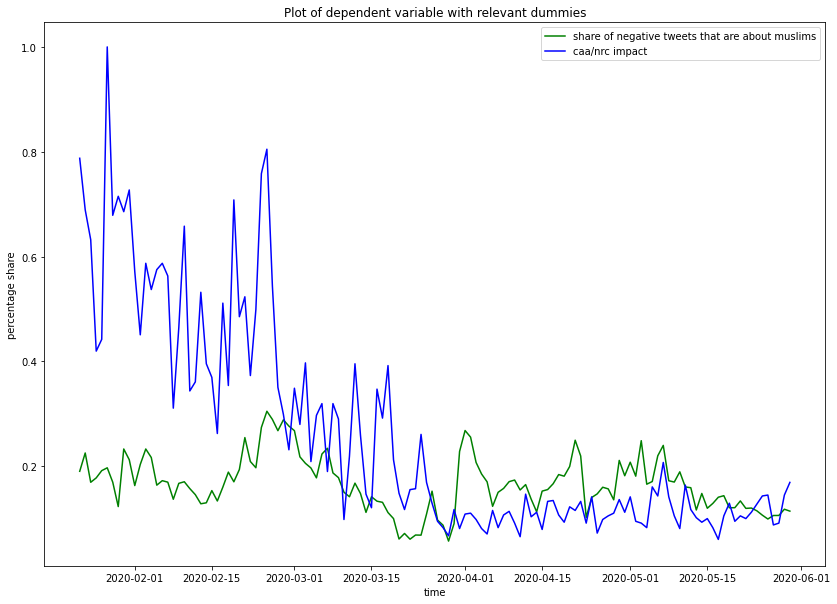

In [31]:
fig, ax = plt.subplots(figsize = (14, 10))
ax.plot(data["muslim_neg_share"], color = "green", label = "share of negative tweets that are about muslims")
ax.plot(data["caa"], color = "blue", label = "caa/nrc impact")
ax.set(xlabel = "time", ylabel = "percentage share", title = "Plot of dependent variable with relevant dummies")
ax.legend()

In [58]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\september_news_data.pkl", "rb") as f:
    news = pickle.load(f)

In [62]:
news

,date,all_news,caa_news,riot_news,covid_news,tablighi_news,ramzan_news,election_news,scovid_news,caa_dummy,riot_dummy,ramzan_dummy,tablighi_dummy,election_dummy,covid_dummy,scovid_dummy,lockdown_dummy,muslim_neg_share
datetime,,,,,,,,,,,,,,,,,,
2020-01-22,2020-01-22,3874,448,40,119,1,0,189,118,0.749164,0.030303,0.0000,0.001414,0.077206,0.034826,0.034553,0,0.190402
2020-01-23,2020-01-23,3796,409,87,144,0,0,284,144,0.683946,0.065909,0.0000,0.000000,0.116013,0.042142,0.042167,0,0.225343
2020-01-24,2020-01-24,3727,339,77,208,0,0,199,208,0.566890,0.058333,0.0000,0.000000,0.081291,0.060872,0.060908,0,0.169439
2020-01-25,2020-01-25,2943,245,48,193,0,2,166,193,0.409699,0.036364,0.0250,0.000000,0.067810,0.056482,0.056515,0,0.177839
2020-01-26,2020-01-26,2756,247,42,137,1,2,70,136,0.413043,0.031818,0.0250,0.001414,0.028595,0.040094,0.039824,0,0.191657
2020-01-27,2020-01-27,3402,598,86,214,1,5,208,213,1.000000,0.065152,0.0625,0.001414,0.084967,0.062628,0.062372,0,0.197055
2020-01-28,2020-01-28,3698,470,62,285,1,0,229,284,0.785953,0.046970,0.0000,0.001414,0.093546,0.083406,0.083163,0,0.169652
2020-01-29,2020-01-29,3815,488,67,313,0,0,319,313,0.816054,0.050758,0.0000,0.000000,0.130310,0.091601,0.091654,0,0.123106
2020-01-30,2020-01-30,3794,435,251,302,0,0,270,302,0.727425,0.190152,0.0000,0.000000,0.110294,0.088382,0.088433,0,0.232960


In [61]:
news["muslim_neg_share"] = data["muslim_neg_share"]

In [77]:
df = pd.DataFrame()
df["scovid"] = news["scovid_dummy"].values
df["tablighi"] = news["tablighi_dummy"].values
df["riot"] = news["riot_dummy"].values
df["caa"] = news["caa_dummy"].values
df["election"] = news["election_dummy"].values
df["ramzan"] = news["ramzan_dummy"].values
df["lockdown"] = news["lockdown_dummy"].values
X = add_constant(df)

In [64]:
X

,const,scovid,tablighi,riot,caa,lockdown,election,ramzan
0,1.0,0.034553,0.001414,0.030303,0.749164,0,0.077206,0.0000
1,1.0,0.042167,0.000000,0.065909,0.683946,0,0.116013,0.0000
2,1.0,0.060908,0.000000,0.058333,0.566890,0,0.081291,0.0000
3,1.0,0.056515,0.000000,0.036364,0.409699,0,0.067810,0.0250
4,1.0,0.039824,0.001414,0.031818,0.413043,0,0.028595,0.0250
5,1.0,0.062372,0.001414,0.065152,1.000000,0,0.084967,0.0625
6,1.0,0.083163,0.001414,0.046970,0.785953,0,0.093546,0.0000
7,1.0,0.091654,0.000000,0.050758,0.816054,0,0.130310,0.0000
8,1.0,0.088433,0.000000,0.190152,0.727425,0,0.110294,0.0000
9,1.0,0.086676,0.000000,0.062879,0.647157,0,0.111520,0.0500


In [78]:
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index = X.columns)

const       18.088987
scovid       2.502389
tablighi     1.230891
riot         1.228508
caa          2.914769
election     1.265258
ramzan       1.196672
lockdown     3.022503
dtype: float64

<AxesSubplot:xlabel='datetime'>

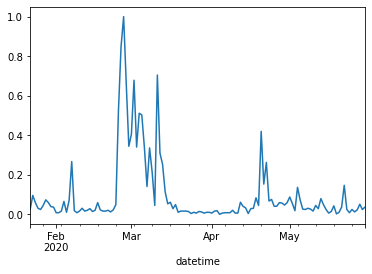

In [83]:
data["riot"].plot()

<AxesSubplot:xlabel='datetime'>

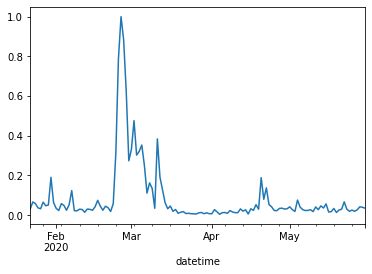

In [84]:
news["riot_dummy"].plot()

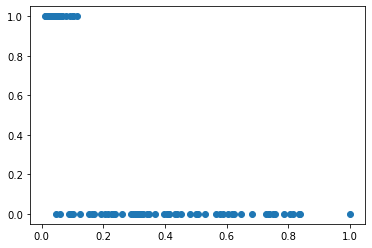

In [80]:
plt.scatter(df["caa"], df["lockdown"])

In [96]:
order, sorder, trend = [(0, 0, 0), (0, 0, 0, 7), 'ct']
exog = np.column_stack([news["caa_dummy"], news["riot_dummy"], news["tablighi_dummy"], news["scovid_dummy"], news["ramzan_dummy"], news["election_dummy"], news["lockdown_dummy"]])
model = SARIMAX(endog = news["muslim_neg_share"].values, order = order, seasonal_order = sorder, trend = trend, exog = exog)
model_fit = model.fit(method = "nm", maxiter = 10000)
model_fit.summary()

Optimization terminated successfully.
         Current function value: -1.935561
         Iterations: 1213
         Function evaluations: 1677


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  130
Model:                        SARIMAX   Log Likelihood                 251.623
Date:                Fri, 16 Sep 2022   AIC                           -483.246
Time:                        19:37:43   BIC                           -454.570
Sample:                             0   HQIC                          -471.594
                                - 130                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1853      0.020      9.090      0.000       0.145       0.225
drift         -0.0005      0.000     -2.228      0.026      -0.001   -5.99e-05
x1             0.0160      0.029      0.549      0.583      -0.041       0.073
x2             0.1628      0.022      7.323      0.000       0.119       0.206
x3             0.1122      0.036      3.119      0.002       0.042       0.183
x4            -0.0855      0.024     -3.505      0.000      -0.133      -0.038
x5             0.0071      0.041      0.174      0.862      -0.073       0.088
x6            -0.0438      0.053     -0.821      0.412      -0.148       0.061
x7             0.0509      0.018      2.848      0.004       0.016       0.086
sigma2         0.0012      0.000      7.663      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                  34.82   Jarque-Bera (JB):                 3.19
Prob(Q):                              0.00   Prob(JB):                         0.20
Heteroskedasticity (H):               1.65   Skew:                             0.36
Prob(H) (two-sided):                  0.11   Kurtosis:                         3.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [87]:
resid = model_fit.resid

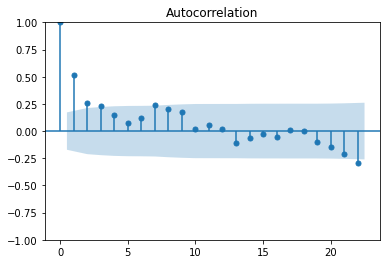

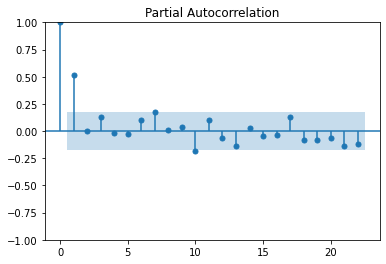

In [88]:
acf_plot = plot_acf(resid)
pacf_plot = plot_pacf(resid, method = "ywm")

In [89]:
dftest = adfuller(resid, autolag = "AIC", regression = "n")
print("1. ADF : ", dftest[0])
print("2. P-value : ", dftest[1])
print("3. num of lags : ", dftest[2])
print("4. num of observations used for ADF regression and critical value condition : ", dftest[3])
print("5. critical values : ")
for key, value in dftest[4].items():
    print("\t", key, ": ", value)
if dftest[1] <= 0.05:
    print("6. Reject Null of unit root")
else:
    print("6. Cannot reject Null of unit root")

1. ADF :  -6.359128827998456
2. P-value :  1.5821478825713516e-09
3. num of lags :  0
4. num of observations used for ADF regression and critical value condition :  129
5. critical values : 
	 1% :  -2.58328973859744
	 5% :  -1.9432698372237431
	 10% :  -1.6149123610266787
6. Reject Null of unit root


In [90]:
dftest = adfuller(resid, autolag = "AIC", regression = "c")
print("1. ADF : ", dftest[0])
print("2. P-value : ", dftest[1])
print("3. num of lags : ", dftest[2])
print("4. num of observations used for ADF regression and critical value condition : ", dftest[3])
print("5. critical values : ")
for key, value in dftest[4].items():
    print("\t", key, ": ", value)
if dftest[1] <= 0.05:
    print("6. Reject Null of unit root")
else:
    print("6. Cannot reject Null of unit root")

1. ADF :  -6.333753357601171
2. P-value :  2.864018582038137e-08
3. num of lags :  0
4. num of observations used for ADF regression and critical value condition :  129
5. critical values : 
	 1% :  -3.482087964046026
	 5% :  -2.8842185101614626
	 10% :  -2.578864381347275
6. Reject Null of unit root


In [92]:
dftest = adfuller(resid, autolag = "AIC", regression = "ct")
print("1. ADF : ", dftest[0])
print("2. P-value : ", dftest[1])
print("3. num of lags : ", dftest[2])
print("4. num of observations used for ADF regression and critical value condition : ", dftest[3])
print("5. critical values : ")
for key, value in dftest[4].items():
    print("\t", key, ": ", value)
if dftest[1] <= 0.05:
    print("6. Reject Null of unit root")
else:
    print("6. Cannot reject Null of unit root")

1. ADF :  -6.306829084893297
2. P-value :  4.866736828948601e-07
3. num of lags :  0
4. num of observations used for ADF regression and critical value condition :  129
5. critical values : 
	 1% :  -4.030719874481119
	 5% :  -3.4450882414779223
	 10% :  -3.1473396994394625
6. Reject Null of unit root


In [93]:
kpss_test = kpss(resid, regression = "c")
if kpss_test[1] <= 0.05:
    print("Reject null of stationarity in favour of unit root")
else:
    print("Cannot reject null of stationarity in favour of unit root")

Cannot reject null of stationarity in favour of unit root


C:\Users\rahul\miniconda3\envs\Thesis\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [94]:
kpss_test = kpss(resid, regression = "ct")
if kpss_test[1] <= 0.05:
    print("Reject null of stationarity in favour of unit root")
else:
    print("Cannot reject null of stationarity in favour of unit root")

Cannot reject null of stationarity in favour of unit root


C:\Users\rahul\miniconda3\envs\Thesis\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [97]:
def sarima_configs():
    models = []
    p_params = [0, 1, 2, 3]
    d_params = [0]
    q_params = [0, 1, 2, 3]
    t_params = ["n", "c", "t", "ct"]
    P_params = [0, 1, 2, 3]
    D_params = [0]
    Q_params = [0, 1, 2, 3]
    m_params = [0, 7]
    for p in p_params:
        for d in d_params:
            for q in q_params:
                for t in t_params:
                    for P in p_params:
                        for D in D_params:
                            for Q in Q_params:
                                for m in m_params:
                                    cfg = [(p, d, q), (P, D, Q, m), t]
                                    models.append(cfg)
    return models

In [98]:
cfg_list = sarima_configs()
t = time()
rel_models = []
exog = np.column_stack([news["caa_dummy"], news["riot_dummy"], news["tablighi_dummy"], news["scovid_dummy"], news["ramzan_dummy"], news["election_dummy"], news["lockdown_dummy"]])
with catch_warnings():
    filterwarnings("ignore")
    for cfg in cfg_list:
        try:
            order, sorder, trend = cfg
            model = SARIMAX(endog = news["muslim_neg_share"].values, order = order, seasonal_order = sorder, trend = trend, exog = exog)
            model_fit = model.fit(disp = False, method = "nm", maxiter = 10000)
            if trend == "n":
                p_values_list = model_fit.pvalues[7:][:-1]
                p_values = p_values_list
            elif trend == "c" or trend == "t":
                p_values_list = model_fit.pvalues[8:][:-1]
                p_values = np.insert(p_values_list, 0, model_fit.pvalues[0])
            else:
                p_values_list = model_fit.pvalues[9:][:-1]
                p_values = np.insert(p_values_list, 0, model_fit.pvalues[:2])
            p_vals_mask = [p_val <= 0.05 for p_val in p_values]
            if len(p_vals_mask) == sum(p_vals_mask):
                rel_models.append((cfg, model_fit.bic))
                print("Model > [%s]%.3f"%(str(str(cfg)), model_fit.bic))
            else:
                pass
        except:
            pass
print("time taken: {} mins".format(round((time() - t)/60, 2)))

Model > [[(0, 0, 0), (0, 0, 0, 0), 'n']]-364.291
Model > [[(0, 0, 0), (0, 0, 0, 7), 'n']]-364.291
Model > [[(0, 0, 0), (0, 0, 1, 7), 'n']]-391.266
Model > [[(0, 0, 0), (1, 0, 0, 7), 'n']]-409.341
Model > [[(0, 0, 0), (1, 0, 1, 7), 'n']]-407.913
Model > [[(0, 0, 0), (1, 0, 2, 7), 'n']]-418.281
Model > [[(0, 0, 0), (2, 0, 3, 7), 'n']]-408.504
Model > [[(0, 0, 0), (3, 0, 2, 7), 'n']]-419.020
Model > [[(0, 0, 0), (0, 0, 0, 0), 'c']]-454.047
Model > [[(0, 0, 0), (0, 0, 0, 7), 'c']]-454.047
Model > [[(0, 0, 0), (0, 0, 1, 7), 'c']]-464.464
Model > [[(0, 0, 0), (1, 0, 0, 7), 'c']]-462.570
Model > [[(0, 0, 0), (2, 0, 1, 7), 'c']]-469.302
Model > [[(0, 0, 0), (0, 0, 0, 0), 't']]-381.161
Model > [[(0, 0, 0), (0, 0, 0, 7), 't']]-381.161
Model > [[(0, 0, 0), (0, 0, 1, 7), 't']]-405.026
Model > [[(0, 0, 0), (2, 0, 3, 7), 't']]-391.749
Model > [[(0, 0, 0), (3, 0, 2, 7), 't']]-394.828
Model > [[(0, 0, 0), (0, 0, 0, 0), 'ct']]-454.570
Model > [[(0, 0, 0), (0, 0, 0, 7), 'ct']]-454.570
Model > [[(0, 0, 1

In [99]:
rel_models.sort(key = lambda tup: tup[1])
rel_models

[([(1, 0, 0), (0, 0, 1, 7), 'c'], -499.95770358541),
 ([(1, 0, 0), (1, 0, 0, 7), 'c'], -498.7391098059375),
 ([(1, 0, 1), (0, 0, 0, 0), 'n'], -494.3255737704143),
 ([(1, 0, 1), (0, 0, 0, 7), 'n'], -494.3255737704143),
 ([(1, 0, 0), (0, 0, 0, 0), 'c'], -491.61914877155766),
 ([(1, 0, 0), (0, 0, 0, 7), 'c'], -491.61914877155766),
 ([(0, 0, 1), (0, 0, 1, 7), 'c'], -491.30621161564926),
 ([(0, 0, 1), (1, 0, 0, 7), 'c'], -489.98665927717656),
 ([(0, 0, 1), (2, 0, 1, 7), 'c'], -489.72960541463374),
 ([(0, 0, 1), (0, 0, 0, 0), 'c'], -486.59815011372496),
 ([(0, 0, 1), (0, 0, 0, 7), 'c'], -486.59815011372496),
 ([(0, 0, 2), (0, 0, 0, 0), 'c'], -486.43779120453297),
 ([(0, 0, 2), (0, 0, 0, 7), 'c'], -486.43779120453297),
 ([(0, 0, 3), (0, 0, 0, 0), 'c'], -485.91333706742716),
 ([(0, 0, 3), (0, 0, 0, 7), 'c'], -485.91333706742716),
 ([(2, 0, 0), (0, 0, 0, 0), 'n'], -482.74061066049035),
 ([(2, 0, 0), (0, 0, 0, 7), 'n'], -482.74061066049035),
 ([(1, 0, 0), (0, 0, 0, 0), 'n'], -477.865050263151),


In [175]:
order, sorder, trend = [(1, 0, 0), (0, 0, 1, 7), 'c']
exog = np.column_stack([news["riot_dummy"], news["tablighi_dummy"], news["scovid_dummy"]])
model = SARIMAX(endog = news["muslim_neg_share"], order = order, seasonal_order = sorder, trend = trend, exog = exog)
model_fit = model.fit(method = "nm", maxiter = 10000)
model_fit.summary()

C:\Users\rahul\miniconda3\envs\Thesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rahul\miniconda3\envs\Thesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: -2.118549
         Iterations: 883
         Function evaluations: 1304


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                    muslim_neg_share   No. Observations:                  130
Model:             SARIMAX(1, 0, 0)x(0, 0, [1], 7)   Log Likelihood                 275.411
Date:                             Fri, 16 Sep 2022   AIC                           -536.823
Time:                                     23:26:39   BIC                           -516.750
Sample:                                 01-22-2020   HQIC                          -528.666
                                      - 05-30-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0713      0.014      4.939      0.000       0.043       0.100
x1             0.0788      0.034      2.326      0.020       0.012       0.145
x2             0.1284      0.037      3.519      0.000       0.057       0.200
x3            -0.0728      0.026     -2.790      0.005      -0.124      -0.022
ar.L1          0.6069      0.070      8.678      0.000       0.470       0.744
ma.S.L7        0.2413      0.108      2.230      0.026       0.029       0.453
sigma2         0.0008   9.87e-05      8.515      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 3.15
Prob(Q):                              0.73   Prob(JB):                         0.21
Heteroskedasticity (H):               1.23   Skew:                             0.31
Prob(H) (two-sided):                  0.51   Kurtosis:                         3.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

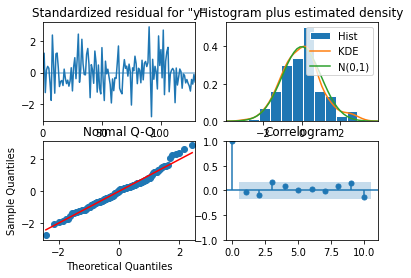

In [118]:
diagnostics = model_fit.plot_diagnostics()

In [176]:
resid = model_fit.resid

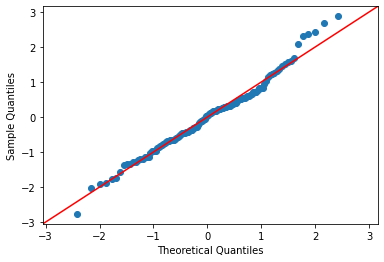

In [177]:
qq_plot = qqplot(resid, fit = True, line = "45")

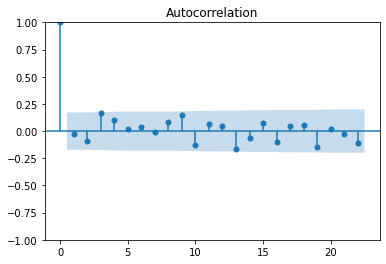

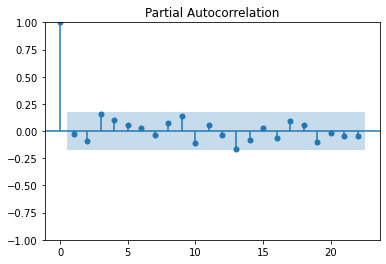

In [113]:
acf_plot = plot_acf(resid)
pacf_plot = plot_pacf(resid, method = "ywm")

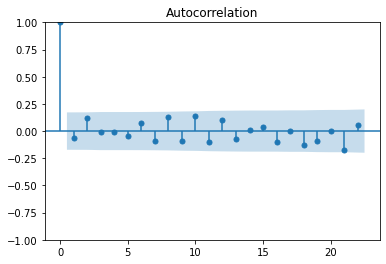

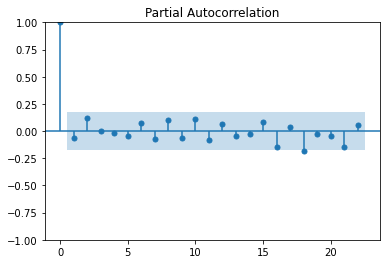

In [124]:
sqr_resid = np.square(resid)
acf_plot = plot_acf(sqr_resid)
pacf_plot = plot_pacf(sqr_resid, method = "ywm")

In [151]:
predicted = model_fit.fittedvalues

In [152]:
predicts = np.array(predicted)

In [154]:
predicts

array([0.18130837, 0.18896042, 0.20698481, 0.17291787, 0.18002286,
       0.18892079, 0.18888725, 0.1743731 , 0.16440425, 0.19749175,
       0.20081888, 0.16915981, 0.19726001, 0.20733272, 0.189434  ,
       0.18868272, 0.18414729, 0.16067809, 0.16113165, 0.18094822,
       0.17747392, 0.15965502, 0.1532481 , 0.14567095, 0.14476186,
       0.16720591, 0.1500068 , 0.16170076, 0.18149602, 0.16974086,
       0.18457583, 0.22676939, 0.19227589, 0.21333659, 0.28926569,
       0.29290161, 0.27206653, 0.25517082, 0.23263991, 0.25229342,
       0.26371096, 0.19116227, 0.19138004, 0.19748313, 0.18406007,
       0.2152394 , 0.22291399, 0.16451575, 0.17871036, 0.1807091 ,
       0.12226193, 0.16161169, 0.16302216, 0.12100016, 0.13558999,
       0.12500593, 0.12005337, 0.12197878, 0.1165933 , 0.08341808,
       0.09384236, 0.0782148 , 0.0792921 , 0.09138312, 0.10399212,
       0.12590624, 0.12221627, 0.09597221, 0.0863204 , 0.20460882,
       0.26056252, 0.24378484, 0.21369398, 0.16974912, 0.16838

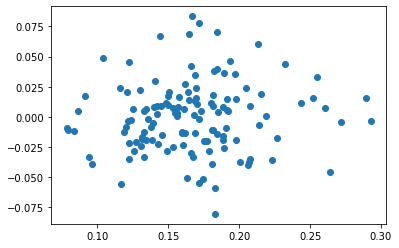

In [155]:
plt.scatter(predicted, resid)

In [178]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                    muslim_neg_share   No. Observations:                  130
Model:             SARIMAX(1, 0, 0)x(0, 0, [1], 7)   Log Likelihood                 275.411
Date:                             Fri, 16 Sep 2022   AIC                           -536.823
Time:                                     23:33:02   BIC                           -516.750
Sample:                                 01-22-2020   HQIC                          -528.666
                                      - 05-30-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0713      0.014      4.939      0.000       0.043       0.100
x1             0.0788      0.034      2.326      0.020       0.012       0.145
x2             0.1284      0.037      3.519      0.000       0.057       0.200
x3            -0.0728      0.026     -2.790      0.005      -0.124      -0.022
ar.L1          0.6069      0.070      8.678      0.000       0.470       0.744
ma.S.L7        0.2413      0.108      2.230      0.026       0.029       0.453
sigma2         0.0008   9.87e-05      8.515      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 3.15
Prob(Q):                              0.73   Prob(JB):                         0.21
Heteroskedasticity (H):               1.23   Skew:                             0.31
Prob(H) (two-sided):                  0.51   Kurtosis:                         3.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [179]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\final_arima_model_2.pkl", "wb") as f:
    pickle.dump(model_fit, f)

In [125]:
from statsmodels.tsa.stattools import breakvar_heteroskedasticity_test as HT

In [126]:
HT(resid)

(1.2167900997880956, 0.5227577618580928)